# <center>Stock Market Prediction And Forecasting Using Stacked LSTM - Task 3</center>

## Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(dataset_link)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [41]:
df.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [44]:
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [56]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [57]:
df1 = df.sort_values('Date')
df1.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


## Visualizing

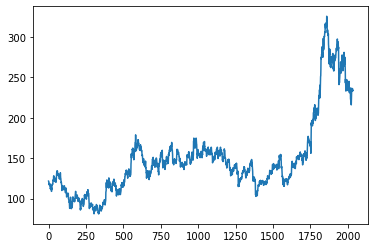

In [58]:
plt.plot(df1['Close'])

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Train and Test Split

In [62]:
training_size=int(len(df_close)*0.75)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

## Data Preprocessing

In [35]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [63]:
y_train.shape

(1221,)

In [64]:
X_train.shape

(1221, 100)

In [65]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Prediction

In [67]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
18/18 [==============================] - 7s 168ms/step - loss: 0.0219 - val_loss: 0.0026
Epoch 2/60
18/18 [==============================] - 2s 117ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 3/60
18/18 [==============================] - 2s 111ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 4/60
18/18 [==============================] - 2s 116ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/60
18/18 [==============================] - 2s 119ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/60
18/18 [==============================] - 2s 120ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/60
18/18 [==============================] - 2s 125ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/60
18/18 [==============================] - 2s 130ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/60
18/18 [==============================] - 3s 161ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/60
18/18 [==============================] - 3s 161ms/step - loss: 0.0013 - val_loss: 0.0011

In [68]:
predictions = model.predict(X_test)

In [70]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [71]:
inv_predictions

array([[161.88654 ],
       [161.26897 ],
       [160.29677 ],
       [159.2202  ],
       [158.33376 ],
       [157.8122  ],
       [157.66666 ],
       [158.03165 ],
       [158.97339 ],
       [160.21315 ],
       [161.49176 ],
       [162.93155 ],
       [164.24277 ],
       [165.70357 ],
       [166.86766 ],
       [167.94641 ],
       [168.50662 ],
       [168.06963 ],
       [166.91644 ],
       [165.58221 ],
       [164.6906  ],
       [164.04163 ],
       [163.2173  ],
       [162.35228 ],
       [161.64317 ],
       [161.17839 ],
       [160.57181 ],
       [159.97235 ],
       [159.27689 ],
       [159.157   ],
       [160.61948 ],
       [163.83678 ],
       [167.01857 ],
       [169.03203 ],
       [169.7381  ],
       [169.26291 ],
       [167.18512 ],
       [164.07048 ],
       [160.89793 ],
       [158.25818 ],
       [156.59106 ],
       [154.81976 ],
       [153.04114 ],
       [151.20625 ],
       [149.90202 ],
       [149.5898  ],
       [150.31032 ],
       [151.9

In [72]:
import math
from sklearn.metrics import mean_squared_error

In [74]:
mse = math.sqrt(mean_squared_error(ytest, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.020155540311570266


In [76]:
math.sqrt(mean_squared_error(ytest,predictions))

0.020155540311570266

In [77]:
temp_input=list(X_test)
temp_input=temp_input[0].tolist()


In [78]:
temp_input

[[0.2465277777777778],
 [0.23611111111111105],
 [0.2520424836601307],
 [0.2591911764705882],
 [0.2577614379084968],
 [0.26817810457516333],
 [0.25449346405228757],
 [0.27103758169934644],
 [0.24530228758169936],
 [0.2675653594771241],
 [0.2726715686274509],
 [0.2663398692810458],
 [0.2741013071895425],
 [0.2861519607843137],
 [0.27818627450980393],
 [0.2720588235294118],
 [0.2712418300653594],
 [0.27798202614379086],
 [0.27083333333333337],
 [0.258578431372549],
 [0.2428513071895425],
 [0.2250816993464052],
 [0.23447712418300648],
 [0.24346405228758172],
 [0.23611111111111105],
 [0.2293709150326797],
 [0.2152777777777778],
 [0.20976307189542487],
 [0.20751633986928097],
 [0.2060866013071896],
 [0.2044526143790849],
 [0.2009803921568627],
 [0.21180555555555558],
 [0.19301470588235292],
 [0.18974673202614378],
 [0.20302287581699352],
 [0.21752450980392146],
 [0.20629084967320255],
 [0.19158496732026142],
 [0.17381535947712412],
 [0.1740196078431372],
 [0.18361928104575165],
 [0.178308823